# K-means

#### Суть:

   Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.

#### Алгоритм:
    
1. Нужно наперед знать в сколько кластеров нужно распределить данные. 
2. Нужно выбрать начальные центры наших кластеров (наугад). Чтобы можно было привязывать каждую точку к центру кластера. Центр – это как Король, вокруг которого собираются его подданные — точки. Именно «расстояние» от центра до точки определяет, кому будет подчиняться каждая точка.
3. Посчитаем расстояние от каждого центра до каждой точки. Это расстояние считается как евклидово расстояние между точками в пространстве. Для центра расстояние, до которого является наименьшим, пересчитываем координаты, как среднее арифметическое между каждой составляющей точки–короля и точки—подданного. Наш центр смещается в пространстве соответственно подсчетам.
4. После пересчета всех центров, мы распределяем точки по кластерам, сравнивая расстояние от каждой точки до центров. Точка помещается в кластер, к центру которого он расположен ближе, чем к остальным центрам.
5. Все начинается сначала, до тех пор, пока точки остаются в одних и тех же кластерах. Часто такого может и не случится, так как при большом количестве данных центры будут перемещаться в малом радиусе, и точки по краям кластеров будут прыгать то в один, то в другой кластер. Для этого нужно определить максимальное число итераций.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Для того, чтобы сравнивать два объекта, необходимо иметь критерий, на основании которого будет происходить сравнение. Как правило, таким критерием является расстояние между объектами.

In [59]:
# рассчитать евклидово расстояние между двумя точками
def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)


# рассчитать сумму квадратов расстояний от точек до центров их классов
def find_sum_sqr_dist(k, df, x_c, y_c):
    j = 0
    for c in range(k):
        for i in range(len(x)):
            if df['cluster'][i] == c:
                j += dist(df['x'][i], df['y'][i], x_c[c], y_c[c])**2
    return j

In [60]:
# найти первоначальный центр
def find_centers(x, y, k):
    # x_c - x center
    x_c = np.mean(x)
    y_c = np.mean(y)
    R = 0
    for i in range(0,n):
        if dist(x[i], y[i], x_c, y_c) > R:
            R = dist(x[i], y[i], x_c, y_c)
    x_cc, y_cc = [], []
    x_cc = [R * np.cos(2 * np.pi * i / k) + x_c for i in range(k)]
    y_cc = [R * np.sin(2 * np.pi * i / k) + y_c for i in range(k)]
    return x_cc, y_cc

In [61]:
# Построить кластеры
def build_clusters(k, x, y, x_cc, y_cc):
    clust = []
    R = 0
    for i in range(0, n):
        R = dist(x[i], y[i], x_cc[0], y_cc[0])
        numb = 0
        for j in range(0, k):
            if R > dist(x[i], y[i], x_cc[j], y_cc[j]):
                R = dist(x[i], y[i], x_cc[j], y_cc[j])
                numb = j
        clust.append(numb)
    return clust


# Перерасчитать центры кластеров
def recalculate_cluster_centers(x, y, x_c, y_c, clust, k):
    for i in range(k):
        n = sum(el == i for el in clust)
        sum_x = sum(x[j] for j in range(len(clust)) if clust[j] == i)
        sum_y = sum(y[j] for j in range(len(clust)) if clust[j] == i)
        x_c[i] = sum_x / n if n != 0 else 0
        y_c[i] = sum_y / n if n != 0 else 0


# график кластеров и их центров
def draw_c(df, x_column, y_column, cluster_column, x_c, y_c, title):
    facet = sns.lmplot(data=df, x=x_column, y=y_column, hue=cluster_column,
                   fit_reg=False, legend=True, legend_out=True)
    plt.scatter(x_c, y_c, s=150, marker='*')
    plt.title(title)

In [62]:
def k_means(k, x, y, sh_grph=True):
    n = len(x)
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['cluster'] = [0] * n
    # найти первоначальный центр
    x_c, y_c = find_centers(df['x'], df['y'], k)
    while True:
        # Построить кластеры
        clusters = build_clusters(k, df['x'], df['y'], x_c, y_c)
        if np.array_equal(clusters, df['cluster']):
            if sh_grph: draw_c(df, 'x', 'y', 'cluster', x_c, y_c, 'k-means')
            break
        else:
            df['cluster'] = clusters
            # Перерасчитать центры кластеров
            recalculate_cluster_centers(df['x'], df['y'], x_c, y_c, clusters, k)
    return df, x_c, y_c

#### Подбор оптимального значения  k (кол-во кластеров)

In [63]:
# Метод суммы квадратов
def choose_optimal_value_k(x, y, alpha):
    df, x_c, y_c = k_means(1, x, y, False)
    old_j = find_sum_sqr_dist(1, df, x_c, y_c)
    for k in range(2, 50):
        df, x_c, y_c = k_means(k, x, y, False)
        j = find_sum_sqr_dist(k, df, x_c, y_c)
        if old_j - j <= alpha:
            print('Оптимальное значение k = {0} : {1}'.format(alpha, k))
            return
        old_j = j
    print('Оптимальное значение k = {0} : {1}'.format(alpha, k))

#### Проверка

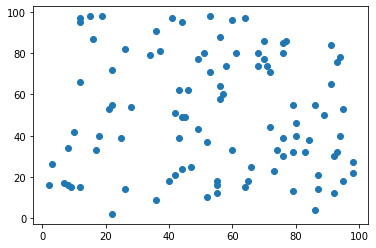

In [64]:
n, k = 100, 4
x = np.random.randint(1, 100, n)
y = np.random.randint(1, 100, n)
plt.scatter(x,y)
plt.show()

In [65]:
choose_optimal_value_k(x, y, 0.8)

Оптимальное значение k = 0.8 : 21


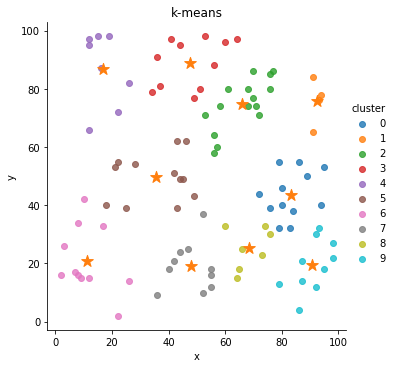

In [66]:
df, x_c, y_c = k_means(10, x, y, True)